# Anomaly Detection – Theory

---

## 1. Definition
Anomaly Detection (also called **Outlier Detection**) is the process of identifying data points that **deviate significantly** from the majority of the data.  
- These unusual points are called **anomalies** or **outliers**.  
- Commonly used in **fraud detection, network security, fault detection, and monitoring systems**.

---

## 2. Key Concepts
- **Normal points**: Data points that follow the expected behavior or pattern.  
- **Anomalies**: Points that **do not conform** to normal patterns.  
- Can be **point anomalies, contextual anomalies, or collective anomalies**.

---

## 3. Methods
### 3.1 Statistical Methods
- Assume data follows a distribution (e.g., Gaussian).  
- Points beyond a certain threshold (e.g., 3 standard deviations) are anomalies.

### 3.2 Proximity-Based Methods
- **Distance-based**: Points far from neighbors are anomalies (e.g., KNN-based).  
- **Density-based**: Low-density regions indicate anomalies (e.g., Local Outlier Factor - LOF).

### 3.3 Machine Learning Methods
- **Isolation Forest**: Randomly splits data; anomalies are easier to isolate.  
- **One-Class SVM**: Learns the boundary around normal data; points outside are anomalies.

---

## 4. Applications
- Fraud detection (banking, credit cards)  
- Network intrusion detection  
- Industrial fault detection  
- Health monitoring (abnormal vital signs)

---

## 5. Advantages
- Helps identify **rare but important events**.  
- Improves **data quality** by detecting noise or errors.  

---

## 6. Limitations
- Anomalies may be **context-specific**.  
- Sensitive to **hyperparameters** in ML-based methods.  
- Difficult in **high-dimensional datasets**.

---

## 7. Implementation in Python
- Libraries: `scikit-learn` provides `IsolationForest`, `OneClassSVM`, `LocalOutlierFactor`.  
- Steps:
  1. Load dataset  
  2. Standardize features  
  3. Train anomaly detection model  
  4. Predict anomalies/outliers  
  5. Visualize results


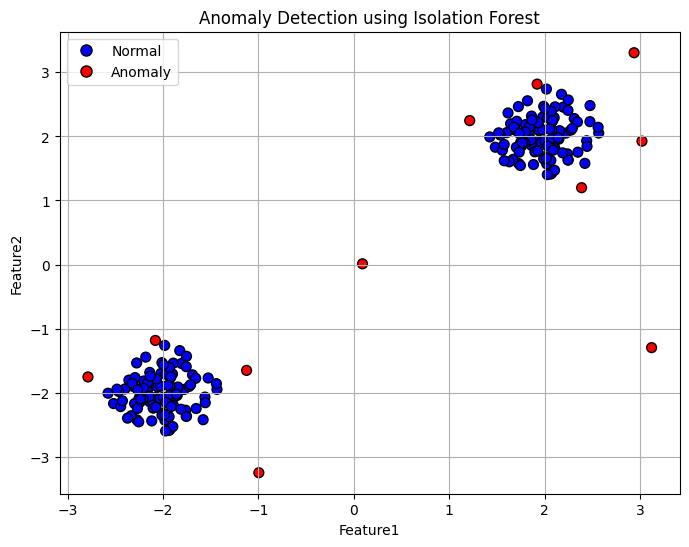


Anomalous points detected:

     Feature1  Feature2  anomaly
37   1.214076  2.246571       -1
89   1.920603  2.816051       -1
137 -2.785924 -1.753429       -1
189 -2.079397 -1.183949       -1
200  3.018985  1.926149       -1
202 -1.124071 -1.651265       -1
204  2.936579  3.305924       -1
205  0.090739  0.012130       -1
206  2.386361  1.199711       -1
208  3.120043 -1.296039       -1
209 -0.995336 -3.248144       -1


In [1]:
# ==============================
# Anomaly Detection – Isolation Forest
# ==============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. Create a synthetic dataset
np.random.seed(42)

# Normal data
X_normal = 0.3 * np.random.randn(100, 2)
# Add some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))

# Combine into one dataset
X = np.r_[X_normal + 2, X_normal - 2, X_outliers]  # shape: (210, 2)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 3. Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# 4. Predict anomalies
# -1 for anomaly, 1 for normal
data['anomaly'] = iso_forest.predict(X_scaled)

# 5. Visualize results
plt.figure(figsize=(8,6))
plt.scatter(data['Feature1'], data['Feature2'],
            c=data['anomaly'].map({1: 'blue', -1: 'red'}),
            s=50, edgecolor='k', label='Points')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=8, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w', label='Anomaly', markerfacecolor='red', markersize=8, markeredgecolor='k')
])
plt.grid(True)
plt.show()

# 6. Print anomalies
print("\nAnomalous points detected:\n")
print(data[data['anomaly'] == -1])
